<a href="https://colab.research.google.com/github/sophia1kucan/Next.js/blob/main/Stats_CW1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'data.frame':	404 obs. of  8 variables:
 $ medv   : num  12 19.9 19.4 13.4 18.2 24.6 21.1 24.7 8.7 27.5 ...
 $ crim   : num  15.0234 0.6274 0.0347 7.0504 0.7258 ...
 $ zn     : num  0 0 35 0 0 0 0 85 0 0 ...
 $ rm     : num  5.3 5.83 6.03 6.1 5.73 ...
 $ age    : num  97.3 56.5 23.3 85.1 69.5 14.7 34.5 35.7 100 100 ...
 $ dis    : num  2.1 4.5 6.64 2.02 3.8 ...
 $ ptratio: num  20.2 21 16.9 20.2 21 19.6 20.2 17.3 20.2 20.2 ...
 $ lstat  : num  24.91 8.47 7.83 23.29 11.28 ...


,medv,crim,zn,rm,age,dis,ptratio,lstat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.0,15.02340,0,5.304,97.3,2.1007,20.2,24.91
2,19.9,0.62739,0,5.834,56.5,4.4986,21.0,8.47
3,19.4,0.03466,35,6.031,23.3,6.6407,16.9,7.83
4,13.4,7.05042,0,6.103,85.1,2.0218,20.2,23.29
5,18.2,0.72580,0,5.727,69.5,3.7965,21.0,11.28
6,24.6,0.19186,0,6.431,14.7,5.4159,19.6,5.08


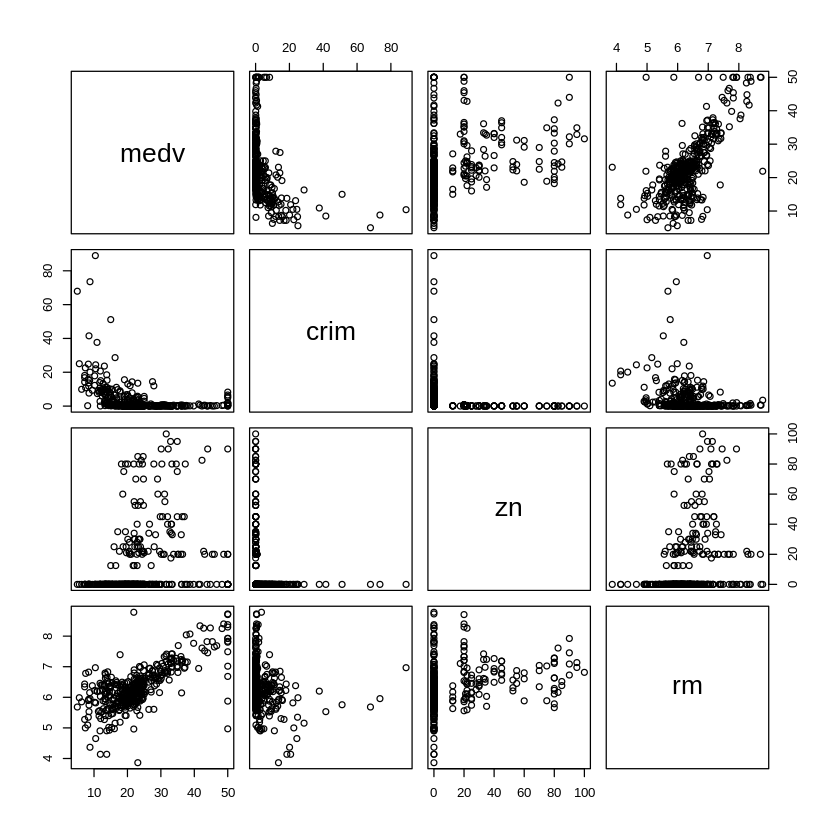

In [22]:
library(readr)
library(ggplot2)

data <- read.csv('/BostonTrain.csv')

#Pol = read.table(data, header = T)
str(data)
head(data)
plot(data[,1:4])
##write analysis here




**Analysis**

`geom_smooth()` using formula = 'y ~ x'


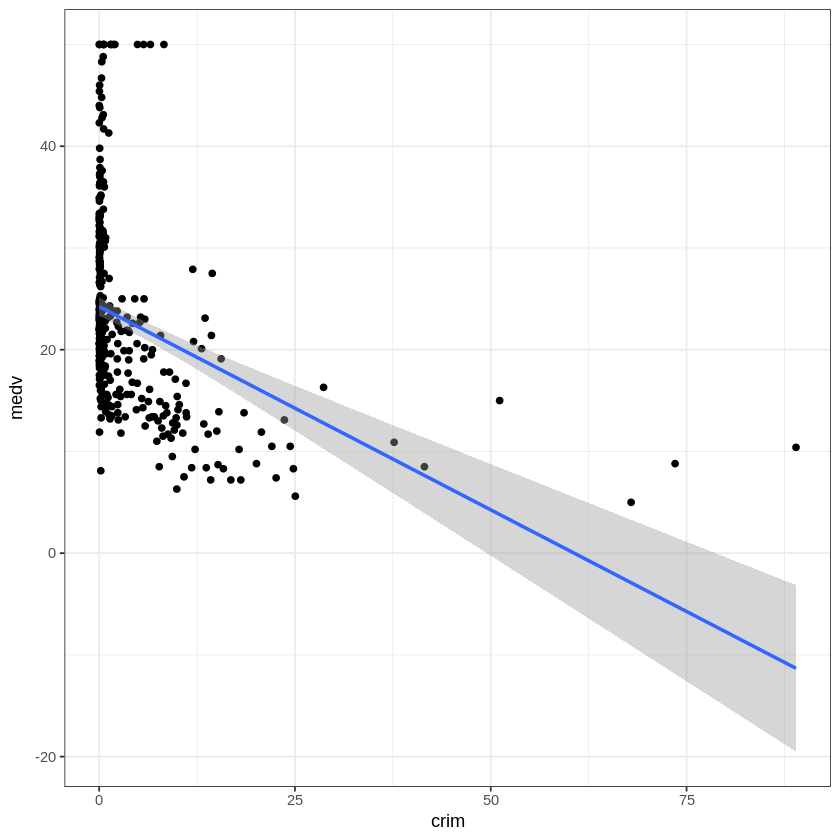

In [24]:
qplot(data=data, x=crim, y=medv, geom = c('point')) + stat_smooth(method = 'lm') + theme_bw()



**Analysis**

`geom_smooth()` using formula = 'y ~ x'


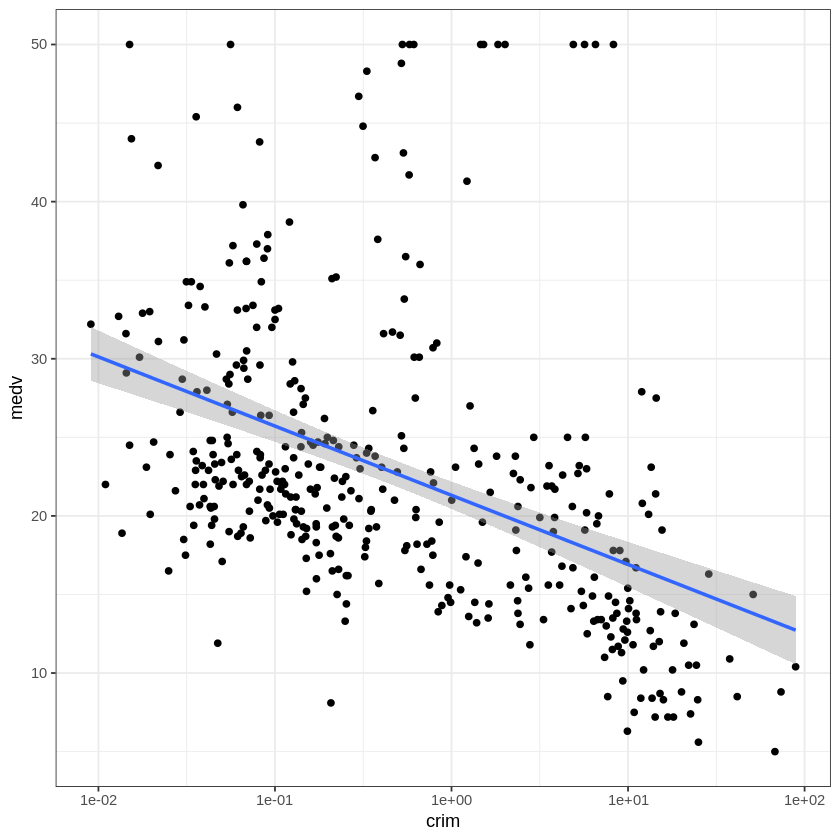

In [23]:
qplot(data=data, x=crim, y=medv, log = 'x', geom = c('point')) + stat_smooth(method = 'lm') + theme_bw()


We can see there is a negative association bewteen crim and medv.